<p><img src="../slides/qcb-logo.png" width="215" height="100" align="right"></p>

# QCBio workshop: Machine Learning With Python -- Day2

Wenbin Guo

### Collaboratory workshop, 10/12/2022
Hello, this is the notebook for the frist day of UCLA QCBio Collaboratory workshop: Machine Learning with Python.   



The github repository can be accessed from this [link](https://github.com/wbvguo/qcbio-ML_w_Python.git)   

for more information about the registration information, please go to this [website](https://qcb.ucla.edu/collaboratory/workshops/w17-machine-learning-with-python/)

### Credits
Thanks Dr. Seyoon Ko and previous Collaboratory fellow Dr. Thiago S Mosqueiro and Dr. Renaud Dessalles for some supporting materials

### Goals of this notebook tutorial
- try different supervised learning algorithms for 2 classification problems
- tune hyperparameters with cross validation
- understand underfitting and overfitting



### Table of Contents
[1. Preparation](#preparation)    
&nbsp; &nbsp; [1.1 scikit-learn Design](#sklearn_design)    
&nbsp; &nbsp; [1.2 import packages](#import_packages)    
&nbsp; &nbsp; [1.3 data preparation](#data_preparation)    
[2. Classification](#classification)    
&nbsp; &nbsp; [2.1 Logistic regression](#log_reg)    
&nbsp; &nbsp; [2.2 Support vector machines](#svm)  
&nbsp; &nbsp; [2.3 Naive bayes](#nb)   
&nbsp; &nbsp; [2.4 K-nearest neighbor](#knn)   
&nbsp; &nbsp; [2.5 Decision trees](#decision_tree)   
&nbsp; &nbsp; [2.6 Random forest](#randomforest)   
&nbsp; &nbsp; [2.7 XGBoost](#xgboost)   
&nbsp; &nbsp; [2.8 Neural network](#nn)   
[3. An linearly nonseparable example](#linear_nonseparable)   
&nbsp; &nbsp; [3.1 logistic regression: underfit](#log_reg_underfit)   
&nbsp; &nbsp; [3.2 Decision tree: overfit](#decision_tree_overfit)  
&nbsp; &nbsp; [3.3 SVM: tune parameters](#svm_tune_para)  
&nbsp; &nbsp; [3.4 Tuning Hyperparameters with validation set](#hyperparameter_val)

<a id='preparation'></a>
# 1. Preparation

<a id='import_packages'></a>
## 1.1 import packages

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from toggle_cell import toggle_code as hide_solution # for teaching

<a id='data_preparation'></a>
## 1.2 data preparation

### load data

In [2]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

In [3]:
bcancer.data.shape

(569, 30)

In [4]:
bcancer.target.shape

(569,)

### split data
Before doing anyting, it is a good practice to split the dataset into training set and test set. 

- training set (learning set): used to fit the machine learning model.
- test set: used to evaluate the fit machine learning model. 
    - Shall not be used in training, to see how well the model _generalizes_ to the data yet to be seen by the classifier. 
    - It will be our _final proof_. We will use other methods _not_ involving this test set to estimate accuracy during the the model training (validation set / cross validation)
    
<div>
<img src="train_test.png" width="500"/>
</div>


sklearn provide an convinient way to split your data into training and test set by using `train_test_split`

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bcancer.data, bcancer.target, 
                                                    test_size=0.2, random_state=2022)

In [6]:
X_train.shape

(455, 30)

In [7]:
y_train.shape

(455,)

In [8]:
y_test.shape

(114,)

In [9]:
np.unique(y_train, return_counts=True) 

(array([0, 1]), array([166, 289]))

In [10]:
np.unique(y_test, return_counts=True) # imbalanced dataset, more 0 than 1

(array([0, 1]), array([46, 68]))

In [11]:
list(bcancer.target_names)

['malignant', 'benign']

<a id='sklearn_design'></a>
## 1.3 scikit-learn Design

Scikit-Learn’s API is remarkably **well designed**. These are the main [design principles](https://arxiv.org/abs/1309.0238):
- Consistency: All objects share a consistent and simple interface
    - Estimators: object that can estimate some parameters based on a dataset, estimation is performed by `fit()` method, the `fit()` method takes a dataset (or 2 for supervised learning) as a parameter
    - Transformer: estimators that transform a dataset, the transformation is performed by `transform()` method
    - Predictors: estimator that can make predictions with `predict()` method, it also has a `score()` method that measures the quality of prediction
- Inspectation: 
    - All the estimator’s hyperparameters are accessible directly via public instance variables
    - All the estimator’s learned parameters are accessible via public instance variables with an underscore suffix

- Compatiblility with other packages: Datasets are represented as NumPy arrays or SciPy sparse matrices
- Composition: Existing building blocks are reused as much as possible. For example the `Pipeline` estimator can combine data transformations and final estimator
- Sensible defaults: Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system
- User-friendly websites and great documentation: [website](https://scikit-learn.org/stable/index.html)

<a id='classification'></a>
# 2. Classification 

<a id='log_reg'></a>
## 2.1 Logistic regression

### model trainng and prediction

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/wbguo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_fit  = log_reg.predict(X_train) # for later demonstration
y_pred = log_reg.predict(X_test)

In [15]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1])

### performance measure

In [16]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_fit, y_train)
cm_train

array([[153,  10],
       [ 13, 279]])

In [17]:
cm_test = confusion_matrix(y_pred, y_test)
cm_test

array([[40,  3],
       [ 6, 65]])

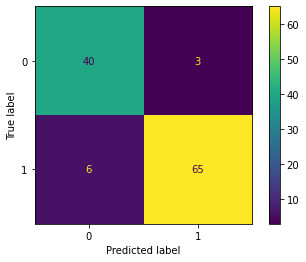

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm_test).plot()

Each row in a confusion matrix represents an actual class, while each column represents a predicted class

Now let's calculate the `accuracy`, `precision`, `recall`, and `f1 score`

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
accuracy_score(y_pred, y_test)

0.9210526315789473

In [21]:
precision_score(y_pred, y_test)

0.9558823529411765

In [22]:
recall_score(y_pred, y_test)

0.9154929577464789

In [23]:
f1_score(y_pred, y_test)

0.9352517985611511

### ROC and PR-ROC curve

In [24]:
y_score = log_reg.predict_proba(X_test)
# alternatively, you can also use log_reg.decision_function(X_test) to achieve similar results

In [25]:
y_score

array([[3.68211412e-03, 9.96317886e-01],
       [2.79658587e-04, 9.99720341e-01],
       [2.05515895e-01, 7.94484105e-01],
       [1.59371677e-03, 9.98406283e-01],
       [2.32660937e-03, 9.97673391e-01],
       [2.44208978e-03, 9.97557910e-01],
       [9.53517629e-01, 4.64823712e-02],
       [9.99999730e-01, 2.70461285e-07],
       [7.37880029e-01, 2.62119971e-01],
       [1.00000000e+00, 8.31939786e-24],
       [1.00000000e+00, 2.07691449e-33],
       [9.99499954e-01, 5.00045830e-04],
       [9.99875614e-01, 1.24385530e-04],
       [9.99994404e-01, 5.59622116e-06],
       [5.36361419e-02, 9.46363858e-01],
       [6.41317633e-04, 9.99358682e-01],
       [7.92587920e-02, 9.20741208e-01],
       [1.11886233e-02, 9.88811377e-01],
       [5.96794197e-01, 4.03205803e-01],
       [3.21894169e-03, 9.96781058e-01],
       [2.08961529e-02, 9.79103847e-01],
       [4.82916991e-02, 9.51708301e-01],
       [8.19244700e-03, 9.91807553e-01],
       [2.31390224e-01, 7.68609776e-01],
       [6.831190

In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score

def plot_roc_curve(y_label, y_score, label = None,color='blue', title=None):
    fpr, tpr, thresholds = roc_curve(y_label, y_score)
    auc = roc_auc_score(y_label, y_score)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, linewidth=2, color = color, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.text(0.6, 0.2, 'AUC=' + str(round(auc, 4)), fontsize=12)
    plt.title(title)
    
def plot_prroc_curve(y_label, y_score, label = None,color='blue', title=None):
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    ap = average_precision_score(y_label, y_score)
    plt.figure(figsize = (5, 5))
    plt.plot(recall, precision, linewidth=2, color = color, label=label)
    plt.xlabel("Recall")
    plt.ylabel("Precision") 
    plt.text(0.6, 0.2, 'AP=' + str(round(ap, 4)), fontsize=12)
    plt.ylim((-0.05,1.05))
    plt.xlim((-0.05,1.05))
    plt.title(title)

For Precision-Recall curve, we calculate the AP (average precision), which summarizes such a plot as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:

$$AP = \sum_n (R_n - R_{n-1}) P_n$$

Where $P_n$ and $R_n$ are the precision and recall at the n-th threshold

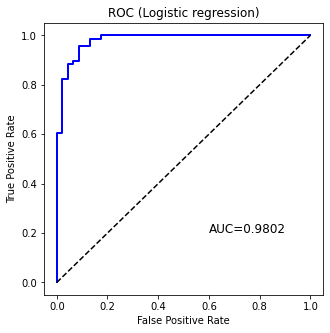

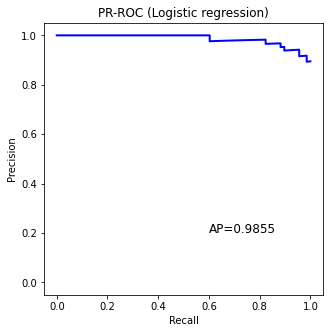

In [27]:
plot_roc_curve(y_test, y_score[:,1], title = "ROC (Logistic regression)")
plt.show()

plot_prroc_curve(y_test, y_score[:,1], title = "PR-ROC (Logistic regression)")
plt.show()

alternatively, you can use the `RocCurveDisplay` or  function provided by the package (quick to use, but less customized options)

In [28]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fpr, tpr, _ = roc_curve(y_test, y_score[:,1], pos_label=log_reg.classes_[1])
prec, recall, _ = precision_recall_curve(y_test, y_score[:,1], pos_label=log_reg.classes_[1])
roc_auc  = roc_auc_score(y_test, y_score[:,1])
ap = average_precision_score(y_test, y_score[:,1])
prroc_auc= roc_auc_score(y_test, y_score[:,1])

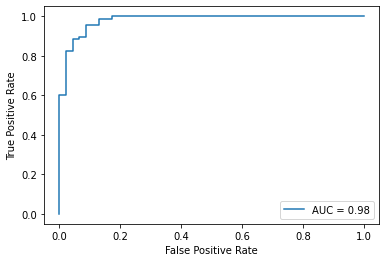

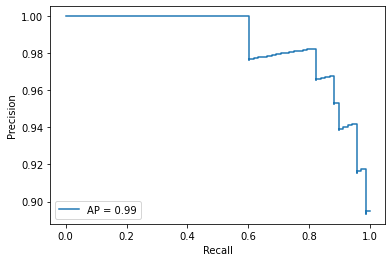

In [29]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc =  roc_auc).plot()
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = ap).plot()

<a id='svm'></a>
## 2.2 Support vector machines (linear)

In [30]:
hide_solution()
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_score = svm_clf.decision_function(X_test)

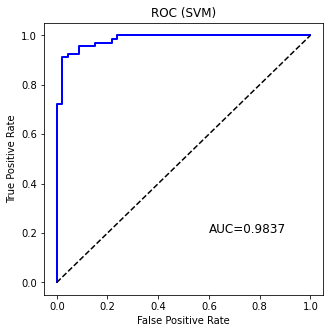

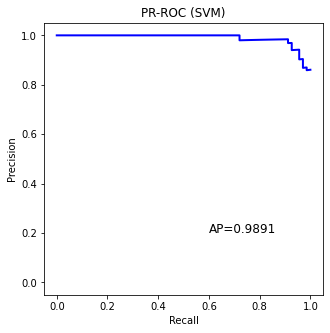

In [31]:
plot_roc_curve(y_test, y_score, title = "ROC (SVM)")
plt.show()

plot_prroc_curve(y_test, y_score, title = "PR-ROC (SVM)")
plt.show()

<a id='nb'></a>
## 2.3 Naive bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_score = gnb_clf.predict_proba(X_test)
y_score

array([[8.57270975e-010, 9.99999999e-001],
       [3.52707409e-018, 1.00000000e+000],
       [2.83125067e-005, 9.99971687e-001],
       [1.55021508e-016, 1.00000000e+000],
       [1.05025807e-005, 9.99989497e-001],
       [4.21769719e-015, 1.00000000e+000],
       [9.98099410e-001, 1.90059029e-003],
       [1.00000000e+000, 1.03331592e-030],
       [1.00000000e+000, 7.31875390e-014],
       [1.00000000e+000, 2.88131036e-244],
       [1.00000000e+000, 4.88729537e-237],
       [9.83230011e-001, 1.67699888e-002],
       [1.00000000e+000, 3.65413095e-014],
       [1.00000000e+000, 6.88040828e-032],
       [1.52889711e-004, 9.99847110e-001],
       [3.23655110e-006, 9.99996763e-001],
       [9.88968660e-012, 1.00000000e+000],
       [2.60436030e-017, 1.00000000e+000],
       [1.77368525e-010, 1.00000000e+000],
       [4.70707326e-015, 1.00000000e+000],
       [8.50604209e-014, 1.00000000e+000],
       [1.21482426e-015, 1.00000000e+000],
       [4.00381112e-012, 1.00000000e+000],
       [3.2

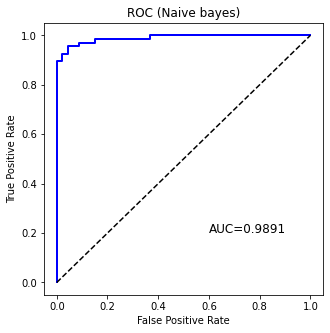

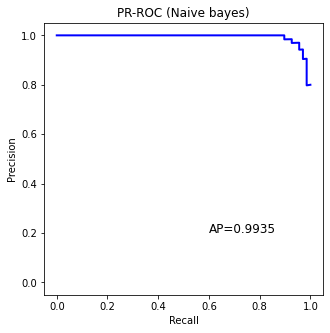

In [33]:
plot_roc_curve(y_test, y_score[:,1], title = "ROC (Naive bayes)")
plt.show()

plot_prroc_curve(y_test, y_score[:,1], title = "PR-ROC (Naive bayes)")
plt.show()

<a id='knn'></a>
## 2.4 K-nearest neighbor

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=30)
knn_clf.fit(X_train, y_train)
y_score = knn_clf.predict_proba(X_test)
y_score

array([[0.16666667, 0.83333333],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.        , 1.        ],
       [0.03333333, 0.96666667],
       [0.        , 1.        ],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.96666667, 0.03333333],
       [0.96666667, 0.03333333],
       [1.        , 0.        ],
       [0.7       , 0.3       ],
       [0.        , 1.        ],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.06666667, 0.93333333],
       [0.        , 1.        ],
       [0.06666667, 0.93333333],
       [0.03333333, 0.96666667],
       [0.03333333, 0.96666667],
       [0.03333333, 0.96666667],
       [0.23333333, 0.76666667],
       [0.        , 1.        ],
       [0.03333333, 0.96666667],
       [0.        , 1.        ],
       [0.63333333, 0.36666667],
       [0.        , 1.        ],
       [0.

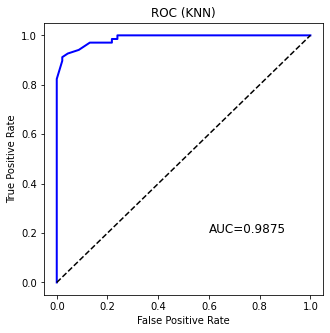

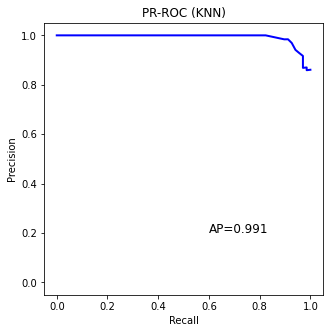

In [35]:
plot_roc_curve(y_test, y_score[:,1], title = "ROC (KNN)")
plt.show()

plot_prroc_curve(y_test, y_score[:,1], title = "PR-ROC (KNN)")
plt.show()

<a id='decision_tree'></a>
## 2.5 Decision trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)
y_score = tree_clf.predict_proba(X_test)

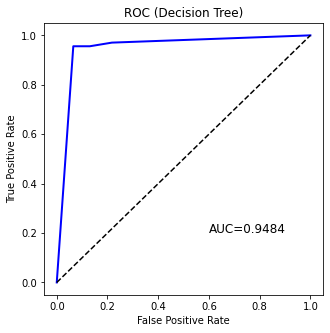

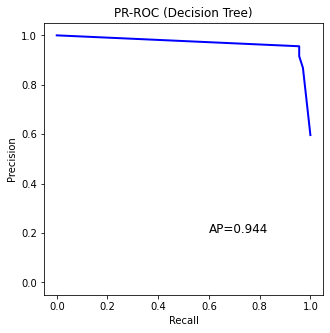

In [37]:
plot_roc_curve(y_test, y_score[:,1], title = "ROC (Decision Tree)")
plt.show()

plot_prroc_curve(y_test, y_score[:,1], title = "PR-ROC (Decision Tree)")
plt.show()

<a id='randomforest'></a>
## 2.6 Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=2022)
forest_clf.fit(X_train, y_train)

y_score = forest_clf.predict_proba(X_test)

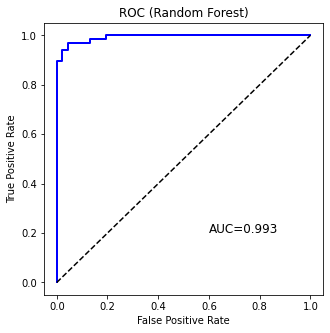

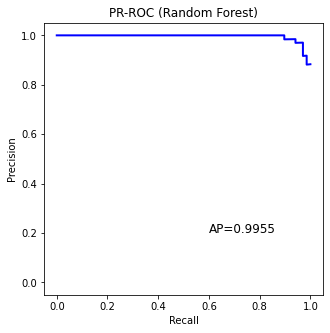

In [39]:
plot_roc_curve(y_test, y_score[:,1], title = "ROC (Random Forest)")
plt.show()

plot_prroc_curve(y_test, y_score[:,1], title = "PR-ROC (Random Forest)")
plt.show()

**Question**: compare randomForest's result with that of DecisionTree, what did you find?

<a id='xgboost'></a>
## 2.7 XGBoost

In [40]:
import sys
!{sys.executable} -m pip install xgboost --user

In [41]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic')
xgb_clf.fit(X_train, y_train)

y_score = xgb_clf.predict_proba(X_test)

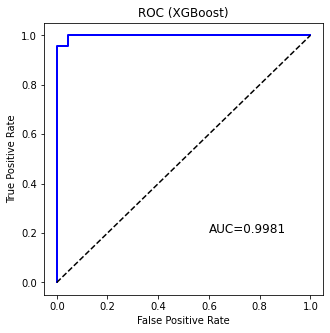

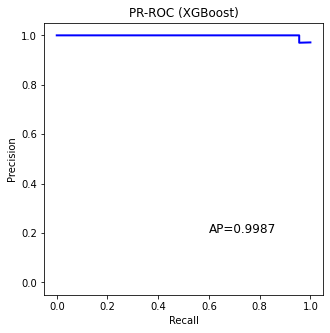

In [42]:
plot_roc_curve(y_test, y_score[:,1], title = "ROC (XGBoost)")
plt.show()

plot_prroc_curve(y_test, y_score[:,1], title = "PR-ROC (XGBoost)")
plt.show()

<a id='nn'></a>
## 2.8 Neural Network

In [43]:
import sys
!{sys.executable} -m pip install tensorflow --user
!{sys.executable} -m pip install keras --user

In [44]:
from tensorflow import keras
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[30, 1]))
model.add(keras.layers.Dense(16,activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

2022-10-12 13:02:45.736693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/wbguo/iproject/BSReadSim/External/HTSLIB/
2022-10-12 13:02:45.736739: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-12 13:02:47.634444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/wbguo/iproject/BSReadSim/External/HTSLIB/
2022-10-12 13:02:47.634484: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-12 13:02:47.634512: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on

The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of
a single stack of layers connected sequentially

<div>
<img src="nn_structure.svg" width="1000"/>
</div>

In [45]:
model.layers

In [46]:
model.build() # to build the model

In [47]:
model.summary() # get the summary of your Neural network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers[1].activation # access each layer by the index

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [49]:
weights, biases = model.layers[1].get_weights()

In [50]:
weights

array([[-0.11055925,  0.1376707 , -0.23571788,  0.16263387,  0.09035251,
        -0.22663793,  0.14012423, -0.31776688, -0.15359089,  0.23927453,
         0.28588   , -0.01646817, -0.05597949, -0.32638097, -0.03151608,
        -0.2657307 ],
       [-0.24846047, -0.23276365,  0.17883006, -0.18807334, -0.34689286,
        -0.33955005,  0.2660524 , -0.00341147, -0.02621037,  0.3522552 ,
         0.07809427, -0.32170865, -0.3498467 ,  0.00132123, -0.13405707,
         0.22908029],
       [-0.35313165,  0.00542   , -0.0372383 , -0.06190053,  0.13388667,
        -0.3002793 , -0.13267712, -0.15691538,  0.14317575, -0.06193963,
         0.27733502,  0.20138851,  0.29192248, -0.16171841,  0.04866275,
        -0.04578999],
       [ 0.18817219, -0.06404072, -0.28708008, -0.16439547,  0.21745482,
         0.25696787,  0.32584235, -0.05712128,  0.0432272 ,  0.32445875,
         0.15303263, -0.16506408,  0.16243479,  0.35760602,  0.2788531 ,
        -0.3563207 ],
       [-0.07276446,  0.23481008,  0

In [51]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

**Question**: why the bias term is initialized as 0, while weights is not?

In [52]:
opt = keras.optimizers.SGD(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 1s 19ms/step - loss: 48.3114 - accuracy: 0.4914 - val_loss: 7.2794 - val_accuracy: 0.8261
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 11.5441 - accuracy: 0.6699 - val_loss: 2.6617 - val_accuracy: 0.8913
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 15.4625 - accuracy: 0.5623 - val_loss: 26.2510 - val_accuracy: 0.2391
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 15.8684 - accuracy: 0.6112 - val_loss: 3.4337 - val_accuracy: 0.8913
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 9.8403 - accuracy: 0.6528 - val_loss: 20.7438 - val_accuracy: 0.2391
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 13.3562 - accuracy: 0.5868 - val_loss: 16.1726 - val_accuracy: 0.2391
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 10.0244 - accuracy: 0.6430 - val_loss: 0.2500 - val_accuracy: 0.9783
Epoch 8/50

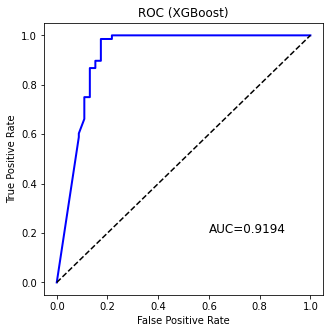

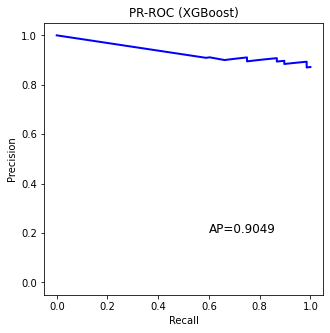

In [54]:
y_score = model.predict(X_test)

plot_roc_curve(y_test, y_score, title = "ROC (XGBoost)")
plt.show()

plot_prroc_curve(y_test, y_score, title = "PR-ROC (XGBoost)")
plt.show()

**Exercise**: reduce the hidden layer's number to 8, try and see if you can get the results better

In [55]:
hide_solution()
# model.add(keras.layers.Dense(8, activation="relu"))

In [56]:
from toggle_cell import toggle_code as hide_solution
#model.add(keras.layers.Dense(16, activation="relu"))

<a id='linear_nonseparable'></a>
# 3. An linearly nonseparable example

The following contents will consider a simple but useful example: 

<div>
<img src="SyntheticDataset.png" width="300"/>
</div>

The day2 folder contains the corresponding files:
* ```CollML_testdataset_features.dat```: contains feature values (2 features for 500 samples)
* ```CollML_testdataset_labels.dat```: contains the class (500 labels)

We will try to run the predict the label based on the features

In [57]:
features_origin = np.loadtxt('CollML_testdataset_features.dat')
labels_origin = np.loadtxt('CollML_testdataset_labels.dat')

### Explore

In [58]:
# check the #samples and #features
print("Shape of features", features_origin.shape)
print("Shape of labels", labels_origin.shape)

Shape of features (500, 2)
Shape of labels (500,)


In [59]:
np.unique(labels_origin)   ## shows unique values in an array

array([0., 1.])

In [60]:
# how many zeros are there?
np.count_nonzero(labels_origin)

250

In [61]:
(labels_origin == 1).sum()

250

In [62]:
features_origin[0, :]

array([0.07779135, 2.03231621])

In [63]:
labels_origin[0]

1.0

### Split data

In [64]:
features, features_test, labels, labels_test = train_test_split(features_origin, labels_origin, 
                                                                test_size=0.2, random_state=2022)

In [65]:
print("Shape of the whole dataset",features_origin.shape)
print("Shape of the train dataset",features.shape)
print("Shape of the test dataset",features_test.shape)

Shape of the whole dataset (500, 2)
Shape of the train dataset (400, 2)
Shape of the test dataset (100, 2)


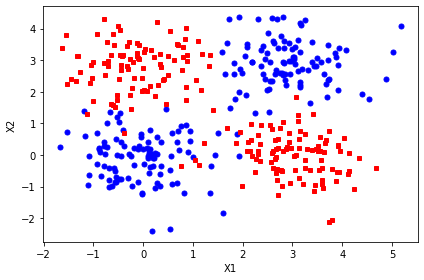

In [66]:
# let's take a look at the visualization
plt.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'o',
           markersize=5, color='b')
plt.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 's',
           markersize=4, color='r')

plt.xlabel('X1')
plt.ylabel('X2')
plt.tight_layout()

<a id='log_reg_underfit'></a>
## 3.1 Logistic regression

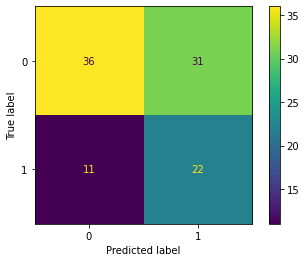

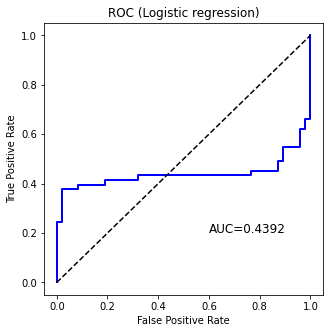

In [67]:
log_reg = LogisticRegression()
log_reg.fit(features, labels)

labels_pred = log_reg.predict( features_test )
labels_score= log_reg.predict_proba( features_test )
cm_test = confusion_matrix(labels_pred, labels_test)
cm_display = ConfusionMatrixDisplay(cm_test).plot()


plot_roc_curve(labels_test, labels_score[:,1], title = "ROC (Logistic regression)")
plt.show()

**seems pretty bad!** clearly the linear classifier clearly underfit the data, let's try some classifier that can adapt to the non-linear scenario.

<a id='decision_tree_overfit'></a>
## 3.2 Decision tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit( features, labels )

DecisionTreeClassifier()

To find the accuracy of this classifier, we can use the method `score`.

In [69]:
tree_clf.score( features, labels )

1.0

That means that our classifier was able to perfectly reproduce all points. Is it too good to be true?

### Drawing the decision boundary
check if we are overfitting by inspecting the model fitting

In [70]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

In [71]:
x

array([-2.00000000e+00, -1.99000000e+00, -1.98000000e+00, -1.97000000e+00,
       -1.96000000e+00, -1.95000000e+00, -1.94000000e+00, -1.93000000e+00,
       -1.92000000e+00, -1.91000000e+00, -1.90000000e+00, -1.89000000e+00,
       -1.88000000e+00, -1.87000000e+00, -1.86000000e+00, -1.85000000e+00,
       -1.84000000e+00, -1.83000000e+00, -1.82000000e+00, -1.81000000e+00,
       -1.80000000e+00, -1.79000000e+00, -1.78000000e+00, -1.77000000e+00,
       -1.76000000e+00, -1.75000000e+00, -1.74000000e+00, -1.73000000e+00,
       -1.72000000e+00, -1.71000000e+00, -1.70000000e+00, -1.69000000e+00,
       -1.68000000e+00, -1.67000000e+00, -1.66000000e+00, -1.65000000e+00,
       -1.64000000e+00, -1.63000000e+00, -1.62000000e+00, -1.61000000e+00,
       -1.60000000e+00, -1.59000000e+00, -1.58000000e+00, -1.57000000e+00,
       -1.56000000e+00, -1.55000000e+00, -1.54000000e+00, -1.53000000e+00,
       -1.52000000e+00, -1.51000000e+00, -1.50000000e+00, -1.49000000e+00,
       -1.48000000e+00, -

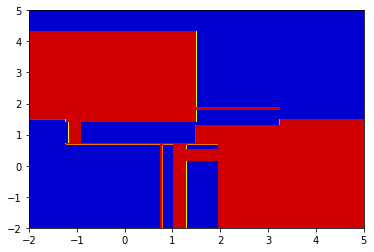

In [72]:
X, Y = np.meshgrid(x, y)
Z    = tree_clf.predict( np.c_[X.ravel(), Y.ravel()] ) 
# c_[a, b] concatenates two arrays horizontally. thus, np.c_[X.ravel(), Y.ravel()] is (len(x) len(y)) x 2 matrix, containing all the grid points.
# Z contains prediction result for each grid point.
# reshape to fit to the shape of the original grid
Z    = Z.reshape( X.shape ) 

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet')) # draws filled contours. blue for class 0, red for class 1.

plt.show()

### useage of `meshgrid` and `ravel`

The `meshgrid` function returns coordinate matrices from the two coordinate vectors. If two vectors (one with length `a` and the other with length `b`) are given as its argument, it returns two 2-dimensional `a x b` arrays, each corresponding to x-coordinates and y-coordinates of `a x b` grid.

In [73]:
nx, ny = (3, 4)
x = np.linspace(0, 1, nx) # [0, 1/2, 1]
y = np.linspace(0, 1, ny) # [0, 1/3, 2/3, 1]
xv, yv = np.meshgrid(x, y)
print("xv = ", xv)
print("yv = ", yv)

xv =  [[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
yv =  [[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667]
 [1.         1.         1.        ]]


the `ravel` function Returns a "flattened" 1-dimensional array.


In [74]:
x = np.array([[1, 2, 3], [4, 5, 6]])

In [75]:
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

`np.c_` concatenates columns horizontally

In [76]:
np.c_[xv.ravel(), yv.ravel()]

array([[0.        , 0.        ],
       [0.5       , 0.        ],
       [1.        , 0.        ],
       [0.        , 0.33333333],
       [0.5       , 0.33333333],
       [1.        , 0.33333333],
       [0.        , 0.66666667],
       [0.5       , 0.66666667],
       [1.        , 0.66666667],
       [0.        , 1.        ],
       [0.5       , 1.        ],
       [1.        , 1.        ]])

`delta` controls the grid resolution

In [77]:
def plot_decision_boundary(clf, delta = 0.01):
    
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.show()

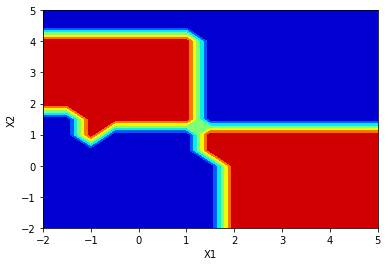

In [78]:
plot_decision_boundary(tree_clf, delta= 0.5)

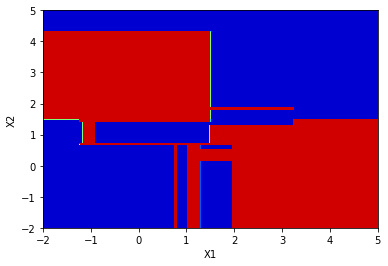

In [79]:
plot_decision_boundary(tree_clf, 0.005)

 It generally shows a successful training, but the boundary shows too complicated, it might not generalize well to new dataset.

### Restrict the descision tree

Our model is too complex, we overfit the model. 
- Need to reduce complexity of the model, e.g., depth of the tree.

Let's use some of the hyper-parameters available in Scikit-learn to modify the learning process.

0.9225


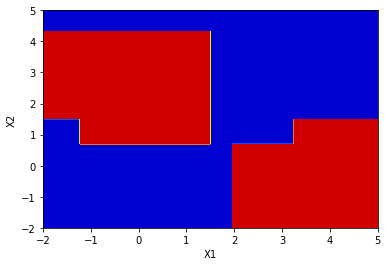

In [80]:
tree_clf = DecisionTreeClassifier( max_depth = 5 )
tree_clf.fit( features, labels )
print( tree_clf.score( features, labels ) )

plot_decision_boundary(tree_clf)

 looks better!

<a id='svm_tune_para'></a>
## 3.3 SVM (with nonlinear support)

We mentioned that SVM can be adaptive to the linearly non-separable problem using kernel tricks or adding high order features.

Other algorithms like `neural network`, `random Forest`, `XGBoost` can also well adapted to nonlinear task, we are not going to try that today, but you are encouraged to try it out after the workshop


We will deal with two hyperparameters: `C` and `gamma`.

- `C` controls how much you want to avoid margin violation (misclassification)
    - Low `C`, it is less sensitive to misclassification, resulting in simpler boundary
    - High `C`, it is more sensitive to misclassification, more complex boundary.

- `gamma` controls how far the influence of a single training example reaches, low meaning "far", and high meaning "close".  
    - Low `gamma`, each training example influences points further away, resulting in simpler boundary
    - High `gamma`, each training example influences only short distance, resulting in more complex boundary. 
    
For more information, please refer to its official [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [81]:
clf = SVC()
clf.fit( features, labels )
print( clf.score( features, labels ) )

0.9625


With a high value of `gamma`: 

In [82]:
clf = SVC(gamma=10000.)
clf.fit( features, labels )
print( clf.score( features, labels ) )

1.0


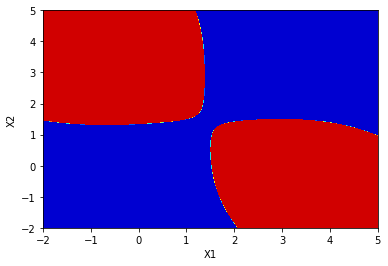

In [83]:
clf = SVC()
clf.fit( features, labels )
plot_decision_boundary(clf)

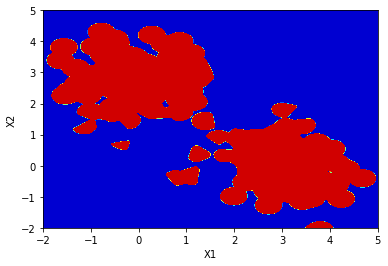

In [84]:
clf = SVC( C = 1000, gamma = 100 )
clf.fit( features, labels )
plot_decision_boundary(clf)

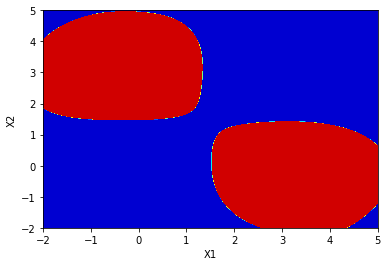

In [85]:
clf = SVC( C = 0.02 ,gamma = 1 )
clf.fit( features, labels )
plot_decision_boundary(clf)

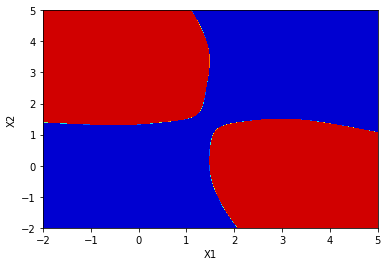

In [86]:
clf = SVC( C = 0.1, gamma = 1. )
clf.fit( features, labels )
plot_decision_boundary(clf)

<a id='hyperparameter_val'></a>
## 3.4 Tuning Hyperparameters with validation set

### Hyperparameters

__Hyperparameters__ are the parameters that are used to create a model. `max_depth` of decision tree, `C` and `gamma` in support vector machine, etc. 

How do we choose them while avoiding underfitting and overfitting?

You may be tempted to peek the performance on the test set and calibrate hyperparameter, but that introduces bias, and you might overfit to the test data. Remember, we want our classifiers generalize well to external data points we did not see in the training process. In this section, we cover systematic methods to tune hyperparameters without introducing bias.

### Train-Validation split

- You should not optimize hyperparameter on the same data you used during training -- you need to split the data into two sets again.
- So, we further split learning set into training set and validation set. 

<div>
<img src="train_validation.png" width="500"/>
</div>

We have split the data into three sets 
- Training set: to fit the model
- Validation set: to select hyperparameters
- Test set: to evaluate the final performance

Caution: do not mix validation set and test set. 

Next, we split training set and validation set using the function `train_test_split()`.

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(features, labels, test_size=0.33, random_state=2022)

Since the splitting is performed at random, to properly estimate accuracy it is ideal perform the train-validation splitting several times.

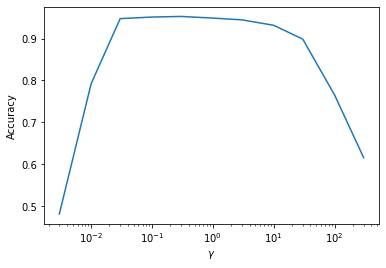

In [88]:
numRepetitions = 100
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = np.zeros( setGammas.shape )

for j in range(numRepetitions):
    k = 0
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    for gamma in setGammas:
        clf = SVC( C = 1., gamma = gamma )
        accuracies[k] += clf.fit( X_train, Y_train ).score(X_valid, Y_valid)
        
        k += 1

accuracies = accuracies / numRepetitions
plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy')
plt.xlabel(r'$\gamma$') 
plt.xscale('log')

plt.show()

If we just look at the training set

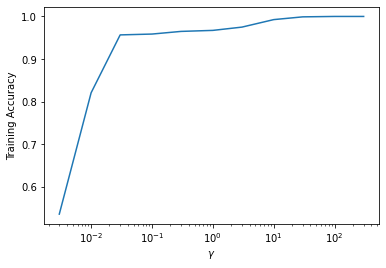

In [89]:
numRepetitions = 100
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = np.zeros( setGammas.shape )

for j in range(numRepetitions):
    k = 0
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    for gamma in setGammas:
        clf = SVC( C = 1., gamma = gamma )
        accuracies[k] += clf.fit( X_train, Y_train ).score(X_train, Y_train) # this line was changed
        
        k += 1

accuracies = accuracies / numRepetitions
plt.plot(setGammas, accuracies)

plt.ylabel(r'Training Accuracy') # this line is changed
plt.xlabel(r'$\gamma$') 
plt.xscale('log')

plt.show()

As you see, the training accuracy monotonically increases, likely to overfit on higher `gamma` when hyperparameters are tuned with training dataset!

We can clearly see the accuracy difference in these 2 scheme

In [90]:
numRepetitions = 100
accuracies = np.zeros( numRepetitions )

for j in range(numRepetitions):
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 0.1 )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_valid, Y_valid)

print(r"Average accuracy (gamma = 0.5): ", accuracies.mean() )


for j in range(numRepetitions):
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels,
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 100. )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_valid, Y_valid)

print("Average accuracy (gamma = 100.): ", accuracies.mean() )

Average accuracy (gamma = 0.5):  0.9515151515151516
Average accuracy (gamma = 100.):  0.7747727272727272


### k-fold cross validation

We split learning set into $K$ pieces, and choose one of them as a validation set in a round-robin fashion. 

<div>
<img src="cross_validation.png" width="500"/>
</div>
Choose the best performing hyperparameter on average. 

In [91]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [92]:
for train_index, valid_index in kf.split( features ):
    X_train = features[train_index]
    X_valid  = features[valid_index]
    Y_train = labels[train_index]
    Y_valid  = labels[valid_index]
    
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    print( clf.score(X_valid, Y_valid) )

0.95
1.0
0.975
1.0
0.95
0.9
0.975
0.95
0.975
0.925


The function `cross_val_score` computes the average cross validation score for you (no need to reinvent the wheel):

In [93]:
from sklearn.model_selection import cross_val_score
clf = SVC( C = 1., gamma = 0.5 )
cross_val_score(clf, features, labels, cv=kf)

array([0.95 , 1.   , 0.975, 1.   , 0.95 , 0.9  , 0.975, 0.95 , 0.975,
       0.925])

In [94]:
cross_val_score(clf, features, labels, scoring="precision", cv=kf)

array([0.91304348, 1.        , 0.95238095, 1.        , 1.        ,
       0.95      , 0.95238095, 1.        , 1.        , 0.875     ])